# 🔧🚗**Mech-Bot 🤖🔧: Automotive Mechanic Assistant**


Welcome to Mech-Bot, your personal automotive mechanic assistant. Mech-Bot leverages RAG (Retrieval-Augmented Generation) and the capabilities of LangChain to provide comprehensive support for diagnosing and repairing vehicle issues. This project aims to make mechanical expertise accessible, reliable, and efficient, addressing common challenges faced by car owners and mechanics.




😉**Key features include:**


---



- AI Diagnostic Support.
- Ease of dealing with Repair Manuals.
- Real-Time Assistance



📚🔧**Data to Use:**


---


- Repair Manuals: Detailed, step-by-step instructions on car maintenance and repair, available in digital formats like PDFs, and loaded using PyMuPDF.

🏛️**Mech-bot architecture:**


---


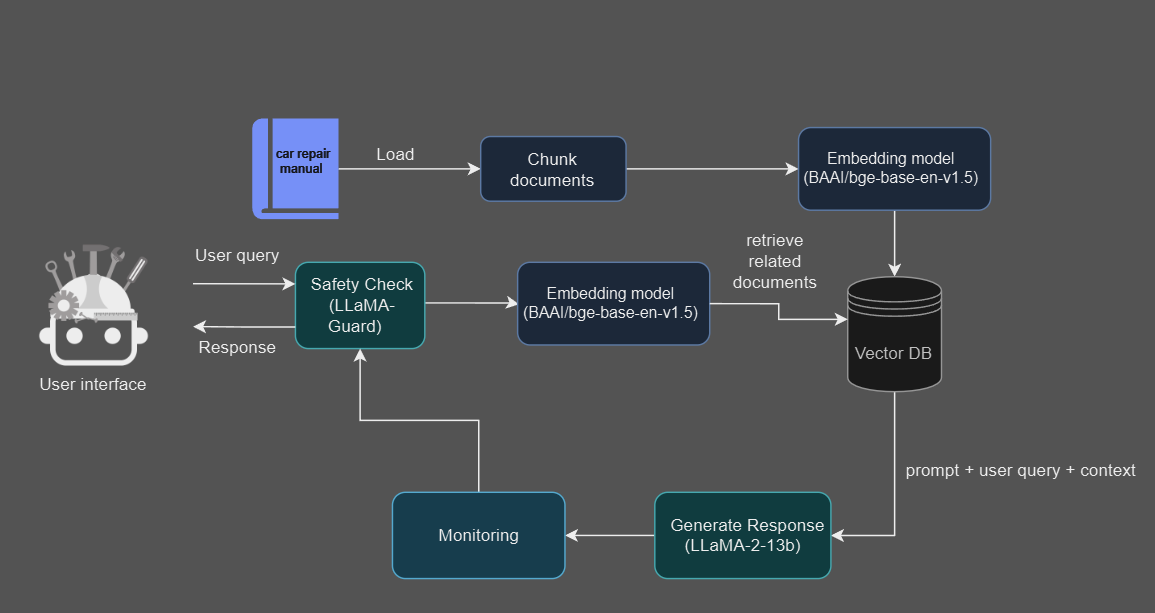



**🦾Technology Stack for Mech-Bot:**


---



1-LLaMA-2-13b-chat-hf: A large language model used for generating responses.

2-LLaMA-Guard: A model used for moderating the safety of generated content.

3-LangChain: Provides functionality for managing language model chains and integrating with various components like retrieval and generation.

4-FAISS: A vector store used for efficient similarity search and retrieval of documents.

5-HuggingFaceEmbeddings: Used for embedding text into vector representations for document retrieval.

6-PyMuPDF: Used for loading and extracting text from PDF documents.

7-RecursiveCharacterTextSplitter: Splits text into chunks for easier processing and indexing.

8-RAGAS: Provides evaluation metrics for assessing the quality of responses.

9-Together AI: Used for evaluating responses with additional metrics and models.

10-WandB: For monitoring and tracking performance metrics during evaluation.

11-Gradio: Provides an interactive web interface for users to interact with Mech-Bot.

12-Weave from WandB: Integrates with the project to handle operations and track metrics.

13-Transformers: Library for working with pre-trained language models from Hugging Face.

14-Torch: Used for working with deep learning models and tensors.

15-Python: The primary programming language used for development.

16-FastAPI: A modern, fast (high-performance) web framework for building APIs with Python. It handles HTTP requests and responses, provides route management, and offers support for asynchronous programming.

17-Uvicorn: An ASGI server for running FastAPI applications. It handles the actual serving of the application to users.

18-Ngrok: A tool that creates secure tunnels to expose local servers to the internet. It generates a public URL that allows external access to the FastAPI application.

### **part 1: Installing Required Packages for Mech-Bot Project**


---



In [ ]:
!pip install --quiet faiss-gpu
!pip install --quiet bitsandbytes
!pip install --quiet transformers
!pip install --quiet langchain
!pip install --quiet huggingface_hub
!pip install --quiet sentence_transformers
!pip install --quiet accelerate
!pip install --quiet torch
!pip install --quiet langchain_community
!pip install --quiet pymupdf
!pip install --quiet gradio
!pip install --quiet ragas
!pip install --quiet weave
!pip install --quiet wandb
!pip install --quiet langchain-together
!pip install fastapi uvicorn nest-asyncio pyngrok

In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok

### **Logging into Weights & Biases**


---



This setup is essential for monitoring and evaluating the Mech-Bot project. we initialized a new Weave project named "Mech-Bot-Evaluation". This project will store and visualize evaluation data, making it easier to analyze the performance of the Mech-Bot system.

In [ ]:
import os
os.environ["WEAVE_TRACE_LANGCHAIN"] = "true"

In [ ]:
import weave
import wandb
wandb.login()
weave.init('Mech-Bot-Evaluation')

wandb: Currently logged in as: khanerd12 (khanerd12-tuwaiq-academy). Use `wandb login --relogin` to force relogin


Logged in as Weights & Biases user: khanerd12.
View Weave data at https://wandb.ai/khanerd12-tuwaiq-academy/Mech-Bot-Evaluation/weave


### **part 2: Data Collection and Preprocessing**

---



This code load and extract text from a PDF file which is a repair manual using LangChain's **PyMuPDFLoader**

The resulting **all_documents** string contains the full textual content of the PDF, which can then be used in the subsequent stages of the Mech-Bot project, such as vectorization, retrieval, or further processing.


---



**Note:** make sure you upload **Mech-bot_DATA(text).pdf**,pdf can be founded in the project's repo:https://github.com/Salsheddi/Mech-bot/tree/main

In [ ]:
from langchain.document_loaders import PyMuPDFLoader
all_documents = ""

# Load PDF data
pdf_loader = PyMuPDFLoader("Mech-bot_DATA(text).pdf")
pdf_documents = pdf_loader.load()

# Extract text from the PDF documents
for pdf_doc in pdf_documents:
    all_documents += pdf_doc.page_content

 ### **Part 3: Splitting Extracted Text into Manageable Chunks**


---
 we split the extracted text from the PDF into smaller, manageable chunks using the RecursiveCharacterTextSplitter from LangChain. This step is vital for optimizing the text for processing by language models


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Split documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=31)
splits = text_splitter.split_text(all_documents)


# Output the split content (for demonstration purposes)
for i, split in enumerate(splits):
    print(f"Split {i + 1}: {split[:100]}...")  # Print the first 100 characters of each split

Split 1: Manual: How to Change Brake Discs on a Car
Tools and Materials Needed
●New Parts: A set of new brake...
Split 2: performance.
3. Shuddering When Braking: Caused by uneven wear or warped discs.
4. Excessive Corrosi...
Split 3: ●Use appropriate safety equipment like wheel chocks and jack stands.
●Follow the specific procedure ...
Split 4: 3. Remove the Caliper
●
Access the Brake Disc:
○Remove any retaining springs, guide pin caps, guide ...
Split 5: ●
Prepare the Hub:
○Clean the wheel hub surface with a wire brush and brake
cleaner.
○Apply an anti-...
Split 6: ●Prepare and Fit Brake Pads:
○Apply anti-squeal paste on pad contact surfaces (avoid excess).
○Insta...
Split 7: pad seating.
○Check and top up the brake fluid level if necessary.
Notes and Warnings
●Always replac...
Split 8: consult your vehicle’s service manual or manufacturer’s instructions.
4o
Manual: How to Change the A...
Split 9: reduce engine performance.
2. Dusty Driving Environment: Frequent driving in dusty cond

### **part 4: Creating a FAISS Vector Store with Hugging Face Embeddings**


---


here we convert the splited text data into document objects which is crucial for further processing in the RAG system, enriches them with metadata, and then stores them in a FAISS vector store using Hugging Face embeddings. This step is essential for enabling fast and efficient similarity search

In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document

# Convert split strings to Document objects
documents = [Document(page_content=split) for split in splits]


# Add source metadata to each document
for doc in documents:
    doc.metadata["source"] = "https://club.autodoc.co.uk/manuals"
# Create the FAISS vector store
db = FAISS.from_documents(documents,
                          HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5'))


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


### **part 5: Configuring the FAISS Vector Store as a Similarity-Based Retrieverr**


---


This code snippet configures the FAISS vector store created earlier to function as a retriever, enabling similarity-based search.This step is crucial for ensuring that the bot can effectively retrieve relevant information during interactions.

The ' k' parameter is set to 4, meaning that the retriever will return the top 4 most similar documents for each search query.

In [ ]:
retriever = db.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 4}
)

In [ ]:
# Manually test retrieval to verify correct chunk fetching
query = "what are the tools needed to change Brake Discs on a Car?"
retrieved_docs = db.similarity_search(query, k=5)

# Print out the content of retrieved documents to verify
for idx, doc in enumerate(retrieved_docs):
    print(f"Document {idx + 1}:", doc.page_content)

Document 1: Manual: How to Change Brake Discs on a Car
Tools and Materials Needed
●New Parts: A set of new brake discs and pads.
●Tools:
○Set of suitable tools for removing wheels and brake system
components.
○Wire brush and a WD-40 type agent.
○Brake cleaner.
○Brake caliper wind-back tool.
●Safety Gear:
○Respirator.
○Gloves.
○Goggles.
Reasons for Replacing Brake Discs
1. Normal Wear: Over time, brake discs wear down due to constant use.
2. Reduced Braking Efficiency: Thinner discs decrease braking
performance.
Document 2: 3. Remove the Caliper
●
Access the Brake Disc:
○Remove any retaining springs, guide pin caps, guide pins, and
caliper bracket fasteners.
○If necessary, use a tool to pry the caliper apart. Suspend the
caliper safely to avoid stretching the brake hose.
4. Remove the Brake Disc
●
Detach the Disc:
○Unscrew fasteners connecting the brake disc to the wheel hub.
○If the disc is stuck, use a rubber mallet to gently tap it loose.
5. Install New Brake Disc
●
Prepare the Hub:


### **part 6: Loading and Configuring the LLaMA-2 Model with 4-Bit Quantization**


---


This setup is essential for running a large language model like LLaMA-2 efficiently, especially in environments with limited computational resources. By using 4-bit quantization, the model's memory footprint is significantly reduced, making it feasible to deploy on standard hardware while maintaining high performance.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from transformers import LlamaTokenizer, LlamaForCausalLM


model_name = "meta-llama/Llama-2-13b-chat-hf"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### **part 7 :Loading and Configuring the LLaMA-Guard Model**


---


This setup ensures that the LLaMA-Guard model can efficiently perform safety checks for ethical use and content moderation while managing memory resources effectively.

In [ ]:
model_id = "meta-llama/LlamaGuard-7b"
guard_tokenizer = AutoTokenizer.from_pretrained(model_id)

bnb_config_guard = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
    # Allow offloading to CPU for parts of the model
    load_in_8bit_fp32_cpu_offload=True
)
guard_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config_guard,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    )

Unused kwargs: ['load_in_8bit_fp32_cpu_offload']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


model-00002-of-00003.safetensors:  33%|###3      | 1.66G/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

### **part 8: Configuring and Integrating a Text Generation Pipeline with LangChain**


---

This code snippet sets up and integrates a text generation pipeline using Hugging Face's transformers library and LangChain's HuggingFacePipeline. This setup is crucial for generating responses

In [ ]:
from langchain.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from transformers import pipeline
from langchain_core.output_parsers import StrOutputParser





text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    temperature=0.2,#to make the output more deterministic
    do_sample=True,
    repetition_penalty=1.1,#Penalizes repeated tokens to reduce redundancy
    return_full_text=False,
    max_new_tokens=512,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)

llm = HuggingFacePipeline(pipeline=text_generation_pipeline)



/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


### **part 9: Setting Up a History-Aware Retriever with Contextualized Question Reformulation**


---
This code snippet configures a `history-aware retriever` that uses contextualized question reformulation to improve the accuracy of information retrieval

`contextualize_q_system_promp`t: A system prompt is defined to guide the model in reformulating user questions. The prompt instructs the model to create a standalone question from the chat history and the latest user question, which can be understood independently of the previous conversation context. The model is only required to reformulate the question and not to provide an answer.

`history_aware_retriever`: Created using `create_history_aware_retriever()`, which integrates the llm (the language model for text generation) with the retriever (the FAISS-based vector store). The `contextualize_q_prompt` is used to reformulate the user's question based on the chat history, improving the relevance of the retrieved information.

In [ ]:
from langchain.chains import create_history_aware_retriever
from langchain.prompts.chat import MessagesPlaceholder
from langchain.prompts import ChatPromptTemplate


contextualize_q_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as is."
)
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)

### **part 10 :Creating a Question-Answer Chain & defining the system prompt**


---
question_answer_chain: Created using `create_stuff_documents_chain()`, which integrates the llm (language model) with the qa_prompt. This chain processes the user’s questions, utilizes the provided context, and generates responses according to the rules specified in the system prompt.


In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
system_prompt = """
You are Mech-bot, a highly knowledgeable car mechanic assistant. Your expertise covers a wide range of automotive issues, including diagnostics, repairs, maintenance, and technical advice. Please answer the question using only the information provided in the context:

If the answer is not available in the context, respond with 'I'm sorry, I don't have enough information to answer that question.'

If the question is 'Who are you?' or similar, respond with 'I am Mech-bot, a specialized assistant in car mechanics. Please ask questions related to car mechanics, and I'll do my best to assist you.'

If the question is unrelated to car mechanics, respond with 'I'm sorry, I specialize in car mechanics. Please ask questions related to car mechanics, and I'll do my best to assist you.'

{context}
</s>
"""
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
question_answer_chain = create_stuff_documents_chain(llm, qa_prompt)

In [ ]:
from langchain.chains import create_retrieval_chain
rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### **part 11: Moderating Chat Content with LLaMA-Guard Model**


---



This function is crucial for filtering and moderating chat content, ensuring that the Mech-Bot's responses adhere to safety and appropriateness guidelines. By leveraging the LLaMA-Guard model, it helps prevent the generation of harmful or inappropriate content, contributing to a safer and more reliable chatbot experience.

In [ ]:
@weave.op
def moderate_with_template(chat):
    input_ids = guard_tokenizer.apply_chat_template(chat, return_tensors="pt")
    output = guard_model.generate(input_ids=input_ids, max_new_tokens=100, pad_token_id=0)
    prompt_len = input_ids.shape[-1]
    return guard_tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)

### **part 12:Integrating Evaluation(RAGAS) and Monitoring for Mech-Bot Responses**


---
here we integrate evaluation within monitoring functionalities. It sets up a comprehensive system for tracking performance and assessing response quality using Ragas which is a framework that helps you evaluate your Retrieval Augmented Generation (RAG) pipelines.

Importing RAGAS Evaluation Metrics:

In [ ]:
from ragas import evaluate
from datasets import Dataset
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
    answer_correctness

)

In [ ]:
emb= HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')

**Setting Up Together AI for Model Evaluation**


---


Llama-3-8B-Instruct-Turbo will be used for evaluation.

In [ ]:
from langchain_together import Together
from getpass import getpass


api_key = getpass("Enter your Together AI API key: ")

eval_llm = Together( # using together ai for evaluation
    model="meta-llama/Meta-Llama-3-8B-Instruct-Turbo",
    together_api_key=api_key,
)

Enter your Together AI API key: ··········


`start_monitor`: Initializes a new experiment run with WandB for tracking performance metrics.


---



In [ ]:
def start_monitor():
    run = wandb.init(
    project="Mech-Bot-Evaluation",
    # name=f"run_{}",
)
    return run

`evaluate_response`: Evaluates the relevance of the response using RAGAS metrics. It creates a dataset from the question, answer, and context, then evaluates using `eval_llm`(Llama-3-8B-Instruct-Turbo) and `embeddings`(BAAI/bge-base-en-v1.5).


---



In [ ]:
@weave.op
def evaluate_response(question, answer, context):
  context_contents = [item.page_content for item in context]
  context_contents
  output = Dataset.from_dict({"question": [question], "answer": [answer], 'contexts': [context_contents]})
  score = evaluate(output, llm = eval_llm, embeddings = emb ,metrics=[answer_relevancy])
  return score

### **part 13: Question Answering Function with Content Moderation**


---



This function, **answer_question**,  for handling user questions, generating responses, and performing safety checks and evaluations. It integrates with the RAG chain and various monitoring tools to ensure the quality and safety of the generated responses.

`answer_question` function decorated with @weave.op to integrate with Weave, allowing it to be part of a workflow.

`run = start_monitor()` Initializes a monitoring run with WandB to track metrics and performance.

`moderate_with_template(chat)` Uses the LLaMA-Guard model to check if the question is safe. If not, returns a message indicating the content might be inappropriate.

`chat_history.extend(...) `Updates chat history with the user's question and the generated response.

`moderate_with_template(system_response)` Checks if the generated response is safe. If not, returns a message indicating potential content issues.

`if score['answer_relevancy'] < 0.7 `Checks if the answer relevancy score is below the acceptable threshold and sends an alert if it is.

`wandb.log(score.to_pandas().to_dict())` Logs the evaluation score to WandB.

In [ ]:
@weave.op
def invoking(question, chat_history):
  return rag_chain.invoke({"input": question, "chat_history": chat_history})

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
chat_history = []
@weave.op
def answer_question(question, history):
    run = start_monitor()  # Start monitoring
       # Check if the question is safe using Llama guard
    chat = [ {"role": "user", "content": question} ]

    if not moderate_with_template(chat) == 'safe':
        return "I'm sorry, but I can't respond to that question as it may contain inappropriate content."

    ai_msg = invoking(question, chat_history)  # Generate AI response
    chat_history.extend(
        [
            HumanMessage(content=question),
            AIMessage(content=ai_msg["answer"]),
        ]
    )
    system_response = [
    {"role": "user", "content": question},
    {"role": "assistant", "content": ai_msg["answer"]},
]
    if not moderate_with_template(system_response) == 'safe':
        return "I generated a response, but it may contain inappropriate content. Let me try again with a more appropriate answer."
    else:

      # Evaluate the response
      score = evaluate_response(question, ai_msg["answer"], ai_msg['context'])
      if score['answer_relevancy'] < 0.7:
        a = score['answer_relevancy']
        run.alert(title='Low Answer Relevancy',
        text=f'Accuracy {a} is below the acceptable theshold')
      # log the run
      wandb.log(score.to_pandas().to_dict())
      run.finish()
      return ai_msg["answer"]

### **Part 14: Launching the Mech-Bot Chat Interface with Gradio**


---
This setup provides an interactive web-based interface where users can ask car mechanic-related questions and receive responses from Mech-Bot. The interface is designed to be user-friendly, allowing easy interaction with the assistant and access to its functionalities.



In [ ]:
import gradio as gr

# Create the Chat interface
iface = gr.ChatInterface(
    answer_question,  # Use the improved answer_question function
    title="Mech-bot: Your Car Mechanic Assistant",
    description="Ask any car mechanic-related questions, and Mech-bot will try its best to assist you.",
    submit_btn="Ask",
    clear_btn="Clear Chat"
)

# Launch the Gradio interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://eeca9673a578f1631f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://eeca9673a578f1631f.gradio.live


### **Part 15: Exposing Mech-bot using FastAPI & Ngrok**:


---


This setup is typically the starting point for building a RESTful API with FastAPI, enabling fast and efficient development of web services.

`from pyngrok import ngrok`: This line imports the ngrok module from the pyngrok library, which provides a way to create secure tunnels to your local server. Ngrok generates a public URL that redirects traffic to your local server, allowing you to share your FastAPI application over the internet for testing, development, or demonstration purposes.

In [ ]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel

In [ ]:
# Expose the app to the internet
from pyngrok import ngrok

In [ ]:
!ngrok config add-authtoken 2kYELGddv0Tg4qrkkFGeEZGl08s_sUP1Q3LXBgeAvDRxBENK

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()

Saving MechBot_5.png to MechBot_5 (1).png


In [ ]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Form
from fastapi.responses import HTMLResponse, JSONResponse
from fastapi.staticfiles import StaticFiles

app = FastAPI()

# Serve the image uploaded to Colab
app.mount("/static", StaticFiles(directory="."), name="static")


@app.get("/", response_class=HTMLResponse)
async def get_form():
    return """
    <html>
        <head>
            <title>AI Chat Interface</title>
            <style>
                @import url("https://fonts.googleapis.com/css?family=Raleway|Ubuntu&display=swap");
                body {
                    margin: 0;
                    padding: 0;
                    font-family: Raleway;
                    height: 100vh;
                    display: flex;
                    flex-direction: column;
                    align-items: center;
                    justify-content: center;
                    background-color: #555555;
                }
                .logo {
                    margin-bottom: 20px;
                }
                .logo img {
                    max-width: 200px;
                    height: auto;
                }
                .chat-box {
                    width: 90%;
                    max-width: 600px;
                    height: 70%;
                    display: flex;
                    flex-direction: column;
                    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
                    background: rgba(255, 255, 255, 0.8);
                    border-radius: 15px;
                }
                .chat-box-header {
                    display: flex;
                    font-size: 14px;
                    padding: 0.5em 0;
                    background-color: #444;
                    color: white;
                    border-top-left-radius: 15px;
                    border-top-right-radius: 15px;
                    align-items: center;
                    justify-content: space-between;
                    padding: 0 20px;
                }
                .chat-box-header h3 {
                    font-family: ubuntu;
                    font-weight: 400;
                    margin: 0;
                }
                .chat-box-body {
                    flex-grow: 1;
                    background: #f8f8f8;
                    overflow-y: auto;
                    padding: 12px;
                    border-bottom-left-radius: 15px;
                    border-bottom-right-radius: 15px;
                }
                .chat-box-body-send, .chat-box-body-receive {
                    display: inline-block;
                    padding: 10px 20px;
                    border-radius: 5px;
                    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
                    margin-bottom: 14px;
                    word-wrap: break-word;
                    white-space: pre-wrap;
                }
                .chat-box-body-send {
                    background: #f0f0f0;
                    color: #333;
                    float: right;
                }
                .chat-box-body-receive {
                    background: #444;
                    color: white;
                    float: left;
                }
                .chat-box-body-receive pre, .chat-box-body-send pre {
                    margin: 0;
                    font-size: 14px;
                }
                .chat-box-footer {
                    display: flex;
                    padding: 10px;
                    background-color: #f0f0f0;
                    border-bottom-left-radius: 15px;
                    border-bottom-right-radius: 15px;
                }
                .chat-box-footer input {
                    padding: 10px;
                    border: none;
                    border-radius: 20px;
                    background: white;
                    font-family: ubuntu;
                    font-weight: 600;
                    color: #333;
                    flex-grow: 1;
                    margin-right: 10px;
                }
                .chat-box-footer .send {
                    padding: 0 20px;
                    background-color: #444;
                    color: white;
                    border-radius: 20px;
                    cursor: pointer;
                }
            </style>
            <script>
                async function sendMessage(event) {
                    event.preventDefault();
                    const question = document.getElementById('question').value;
                    if (question.trim() === '') return;

                    // Display the user's question in the chat
                    const chatBody = document.getElementById('chat-box-body');
                    const userMessage = document.createElement('div');
                    userMessage.className = 'chat-box-body-send';
                    userMessage.innerHTML = `<pre>${question}</pre>`;
                    chatBody.appendChild(userMessage);

                    // Clear the input field
                    document.getElementById('question').value = '';

                    // Scroll to the bottom of the chat
                    chatBody.scrollTop = chatBody.scrollHeight;

                    // Send the question to the server and get the response
                    const response = await fetch('/answer', {
                        method: 'POST',
                        headers: { 'Content-Type': 'application/x-www-form-urlencoded' },
                        body: new URLSearchParams({ question: question })
                    });

                    const result = await response.json();
                    const botMessage = document.createElement('div');
                    botMessage.className = 'chat-box-body-receive';
                    botMessage.innerHTML = `<pre>${result.answer}</pre>`;
                    chatBody.appendChild(botMessage);

                    // Scroll to the bottom of the chat again
                    chatBody.scrollTop = chatBody.scrollHeight;
                }
            </script>
        </head>
        <body>
            <div class="logo">
                <img src="/static/MechBot_5.png" alt="MechBot Logo">
            </div>
            <div class="chat-box">
                <div class="chat-box-header">
                    <h3>Mech Bot</h3>
                </div>
                <div class="chat-box-body" id="chat-box-body">
                    <!-- Chat messages will be appended here -->
                </div>
                <div class="chat-box-footer">
                    <form onsubmit="sendMessage(event)">
                        <input id="question" placeholder="Enter Your Message" type="text" required />
                        <button type="submit" class="send far fa-paper-plane">Send</button>
                    </form>
                </div>
            </div>
        </body>
    </html>
    """

@app.post("/answer", response_class=JSONResponse)
async def get_answer(question: str = Form(...)):
    answer = answer_question(question, '')
    return {"answer": answer}

# Enable running the server in the notebook
nest_asyncio.apply()

# Expose the app using ngrok
from pyngrok import ngrok

port = 8000
public_url = ngrok.connect(port)
print("FastAPI public URL:", public_url)

# Run the FastAPI app with Uvicorn
uvicorn.run(app, host="0.0.0.0", port=port)


FastAPI public URL: NgrokTunnel: "https://2408-34-125-186-25.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [25581]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     188.52.248.78:0 - "GET / HTTP/1.1" 200 OK
INFO:     188.52.248.78:0 - "GET /static/MechBot_5.png HTTP/1.1" 200 OK
INFO:     188.52.248.78:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (
user question: How can I change the engine oil?
AI answer:  To change the engine oil, follow these steps:

1. **Warm the Engine**: Run the engine for a few minutes to warm the oil. This increases its fluidity, making it easier to drain.

2. **Locate Key Components**:
   - Find the Oil Filler Cap located on top of the engine.
   - Identify the Oil Dipstick located in the engine oil pan.
   - Find the Oil Filter which could be a cartridge inserted into a housing or a spin-on component typically on either side of the engine.
   - Locate the Drain Plug under the engine in the oil pan.

3. **Prepare the Vehicle**:
   - **Lift the Car

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (ty, making it easier to drain.

2. **Locate Key Components**:
   - Find the Oil Filler Cap located on top of the engine.
   - Identify the Oil Dipstick located in the engine oil pan.
   - Find the Oil Filter which could be a cartridge inserted into a housing or a spin-on component typically on either side of the engine.
   - Locate the Drain Plug under the engine in the oil pan.

3. **Prepare the Vehicle**:
   - **Lift the Car**: Use a car lift, inspection pit, ramp, or jack with jack stands to access the underside. Make sure the car is level for complete drainage.
   - If necessary, **Remove Splash Guard** that covers the oil fi

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (ty, making it easier to drain.

2. **Locate Key Components**:
   - Find the Oil Filler Cap located on top of the engine.
   - Identify the Oil Dipstick located in the engine oil pan.
   - Find the Oil Filter which could be a cartridge inserted into a housing or a spin-on component typically on either side of the engine.
   - Locate the Drain Plug under the engine in the oil pan.

3. **Prepare the Vehicle**:
   - **Lift the Car**: Use a car lift, inspection pit, ramp, or jack with jack stands to access the underside. Make sure the car is level for complete drainage.
   - If necessary, **Remove Splash Guard** that covers the oil fi

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (ty, making it easier to drain.

2. **Locate Key Components**:
   - Find the Oil Filler Cap located on top of the engine.
   - Identify the Oil Dipstick located in the engine oil pan.
   - Find the Oil Filter which could be a cartridge inserted into a housing or a spin-on component typically on either side of the engine.
   - Locate the Drain Plug under the engine in the oil pan.

3. **Prepare the Vehicle**:
   - **Lift the Car**: Use a car lift, inspection pit, ramp, or jack with jack stands to access the underside. Make sure the car is level for complete drainage.
   - If necessary, **Remove Splash Guard** that covers the oil fi

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (l**: Verify the oil level using the dipstick, ensuring the car is on a flat surface.

8. **Final Steps**:
   - **Start the Engine** and run it for 30 seconds to circulate the new oil.
   - **Recheck Oil Level** after a
user question: What tools do I need?
AI answer:  You'll need a variety of tools including a socket wrench or ratchet and socket, pliers, screwdrivers, and potentially a breaker bar or impact wrench depending on the type of vehicle and its components. Additionally, you may need specialized tools such as a drain pan, oil filter wrench, and a torque wrench.
user question: what is your name
AI answer:  My name is MechB

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (sing. Be gentle to avoid bending the filter.

5. **Install the New Air Filter**: Prepare the area by covering the air inlet to prevent dirt entry. Clean the air filter cover and housing to avoid contamination. Fit the new air filter securely into the housing, ensuring it doesn't bend during installation.

6. **Reassemble the Housing**: Reinstall the cover and secure it. Tighten the fasteners in a criss-cross pattern to ensure an even seal. Reattach any detached components.

Remember to handle the new air filter carefully to maintain its shape and effectiveness. Ensure all fasteners are tightened securely to prevent air leaks.
use

Formatted Prompt:

You are a mechanic assistant and your name is MechBot, these human will ask you questions about Cars,
use Use following piece of context and chat history  to answer the question.
If you don't know the answer, just say you don't know.
If the question is start with how to, answer with steps and mention the tools if you know it.

Chat History: (sing. Be gentle to avoid bending the filter.

5. **Install the New Air Filter**: Prepare the area by covering the air inlet to prevent dirt entry. Clean the air filter cover and housing to avoid contamination. Fit the new air filter securely into the housing, ensuring it doesn't bend during installation.

6. **Reassemble the Housing**: Reinstall the cover and secure it. Tighten the fasteners in a criss-cross pattern to ensure an even seal. Reattach any detached components.

Remember to handle the new air filter carefully to maintain its shape and effectiveness. Ensure all fasteners are tightened securely to prevent air leaks.
use